In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [2]:
df = pd.read_csv('forbes_2022.csv', index_col=[0])

In [32]:
df['multi_people'] = df['name'].str.contains('&') | df['name'].str.contains('and')
df['multi_source'] = df['source'].str.contains(',')
df['age_bins'] = pd.cut(df.age,bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df.head()

,rank,name,networth,age,country,source,industry,multi_people,multi_sourcee,new_col,multi_source,age_bins
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive,False,True,"(40, 50]",True,"(40, 50]"
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology,False,False,"(50, 60]",False,"(50, 60]"
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail,True,False,"(70, 80]",False,"(70, 80]"
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology,False,False,"(60, 70]",False,"(60, 70]"
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments,False,False,"(90, 100]",False,"(90, 100]"


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

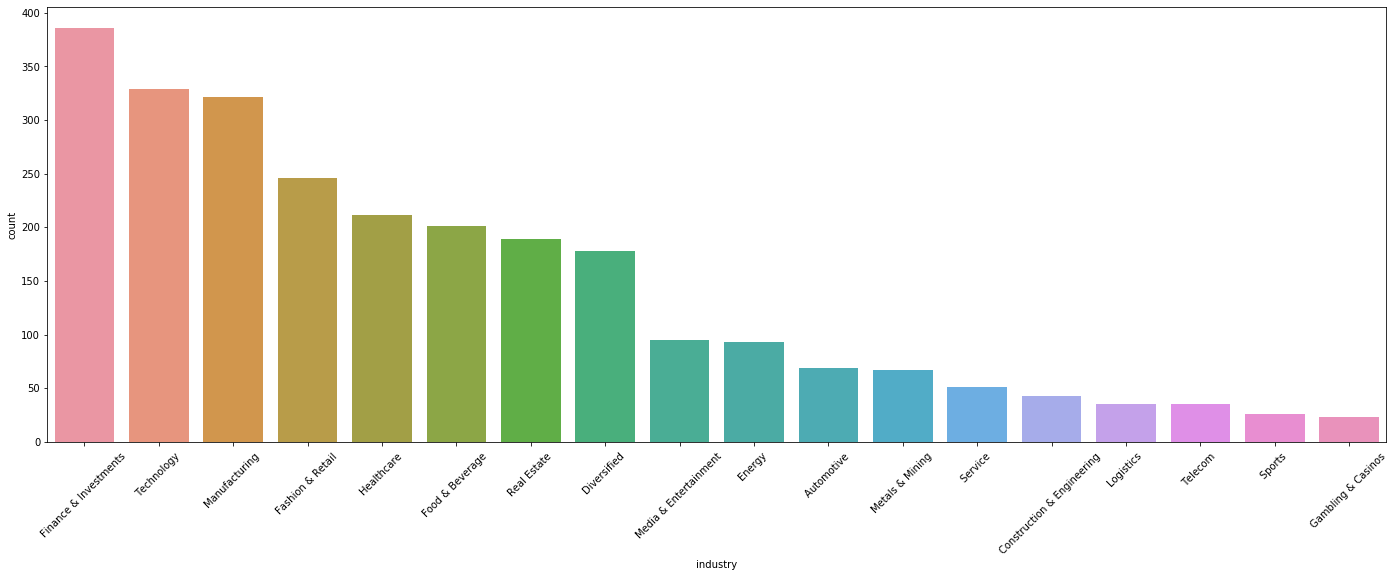

In [20]:
plt.figure(figsize=(24,8))
sns.countplot(x ='industry', data = df, order = df['industry'].value_counts().index)
plt.xticks(rotation=45)

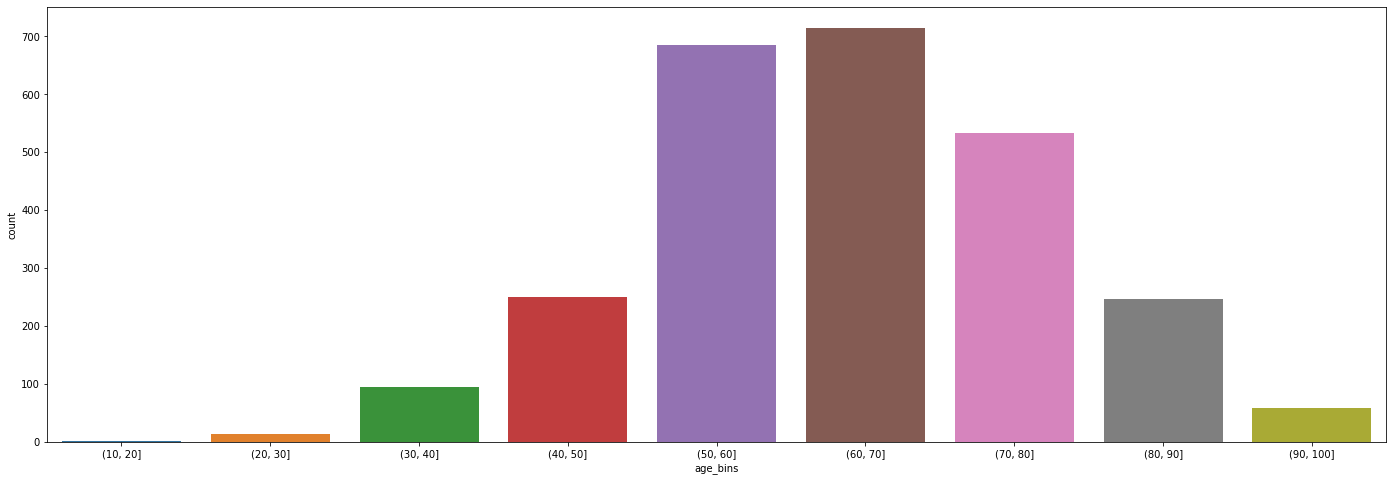

In [34]:
plt.figure(figsize=(24,8))
sns.countplot(x ='age_bins', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]), <a list of 75 Text xticklabel objects>)

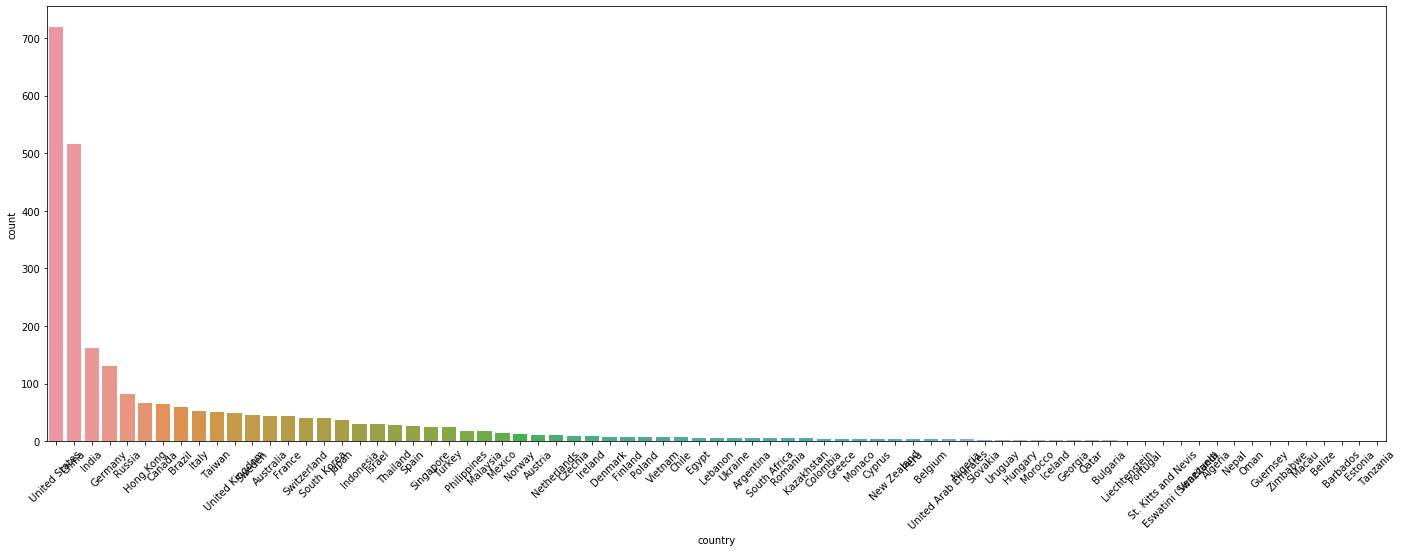

In [35]:
plt.figure(figsize=(24,8))
sns.countplot(x ='country', data = df, order = df['country'].value_counts().index)
plt.xticks(rotation=45)